# Practical Session 4
## Biomedical Signals and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Hamza Mekhzoum and Jef Vandemeulebroucke



<font color=blue>Students names: Yajing Wang - 0609591 & Wouter Apts - 0606577 </font> <Br>
<font color=blue>Academic Year </font>: 2023-2024

### Purpose
The purpose of this exercise session is to obtain insight into feature extraction techniques applied on medical image processing as well as processing of the extracted features. For more information on these concepts see the
related material on the course slides.

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two</b> students. In colab you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline.The zip file should be named as Surname1Name1_Surname2Name2.zip. The <b>deadline</b> for the report submission is <b>January 2th 2024, at 23.59</b>. Any report sent after the deadline will not be graded.


### Required libraries
During this practical session, the following libraries will be used:

* Numpy
* Simple ITK
* Matplotlib
* Sklearn
* pandas

To import any external library, you need to import it using the **import** statement followed by the name of the library.

## Part 1: Feature Extraction
In the first part of this practical session you are given a CT image of a lung, together with the segmentation mask and you are asked to extract features belonging to two important groups of features; first order statistics and shape features.

###  Load the image
1. Download the DICOM image.
2. Use SimpleITK functions SimpleITK.ImageSeriesReader() with GetGDCMSeriesFileNames() to read the DICOM series by providing the whole path where the Dicom series is stored. Documentation can be found [here:](https://simpleitk.readthedocs.io/en/master/link_DicomSeriesReader_docs.html) <br>
3. Use function SimpleITK.ReadImage() to obtain the itk images by providing the obtained dicom series.
4. Use function SimpleITK.GetArrayFromImage() to convert the itk image of the previous step into a numpy array.

*To see the documentation of a function you can type help(the name of a function). For example:<br>
help(SimpleITK.GetImageFromArray) returns <br>
GetImageFromArray(arr, isVector=None) <br>
    Get a SimpleITK Image from a numpy array. If isVector is True, then the Image will have a Vector pixel type, and the last dimension of the array will be considered the component index. By default when isVector is None, 4D images are automatically considered 3D vector images.*


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
#your code here
from os.path import dirname, join as pjoin, exists
from google.colab import drive
import SimpleITK as sitk

drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','WPO4')
folder_name = 'LUNG'
dicom_dir = pjoin(path, folder_name)
# dicom_dir = 'gdrive/MyDrive/WPO4/LUNG'

# Get the file names for the DICOM series
reader = sitk.ImageSeriesReader()
dicom_series_file_names = reader.GetGDCMSeriesFileNames(dicom_dir)

# Set the file names and read the series
itk_image = sitk.ReadImage(dicom_series_file_names)


# Convert the ITK image to a NumPy array
original_array = sitk.GetArrayFromImage(itk_image)
print(original_array)



Mounted at /content/gdrive
[[[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 ...

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -102

### Now load the mask
5. Download the mask.
6. Use SimpleITK function sitk.ReadImage() to read the mask by giving as input the whole path where the mask is stored.
7. Convert the itk mask to a numpy array with function SimpleITK.GetArrayFromImage().

In [ ]:
# your code here
import SimpleITK as sitk

path = pjoin('gdrive', 'MyDrive','WPO4','lung_mask')
file_name = 'lung_mask.mhd'
file_path = pjoin(path, file_name)

lung_image = sitk.ReadImage(file_path)
mask_array = sitk.GetArrayFromImage(lung_image)

print(mask_array)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Note: You can find some examples of SimpleITK's functions [here.](http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html)
On that page it is mentioned that:
"The order of index and dimensions need careful attention during conversion.
ITK's Image class does not have a bracket operator. It has a GetPixel which takes an ITK Index object as an argument, which is an array ordered as (x,y,z). This is the convention that SimpleITK's Image class uses for the GetPixel method as well.
While in numpy, an array is indexed in the opposite order (z,y,x)."

To observe this, get the size of the itkimage resulting from function SimpleITK.ReadImage in step 3. To do this use function GetSize() <br>
Now get the size of the numpy image resulting from function SimpleITK.GetArrayFromImage in step 4.

In [ ]:
itk_size = itk_image.GetSize()  # Get the size of the itk image
print("ITK image size:", itk_size)

numpy_size = original_array.shape  # Get the size (shape) of the numpy array
print("NumPy array size:", numpy_size)

ITK image size: (512, 512, 134)
NumPy array size: (134, 512, 512)


### Visualize some slices of the CT image
In a 2X2 matplolib subplot visualize slices **72,77,82,84** <br>
Use function imshow and a gray colormap

*Remember python's indexes start from zero*

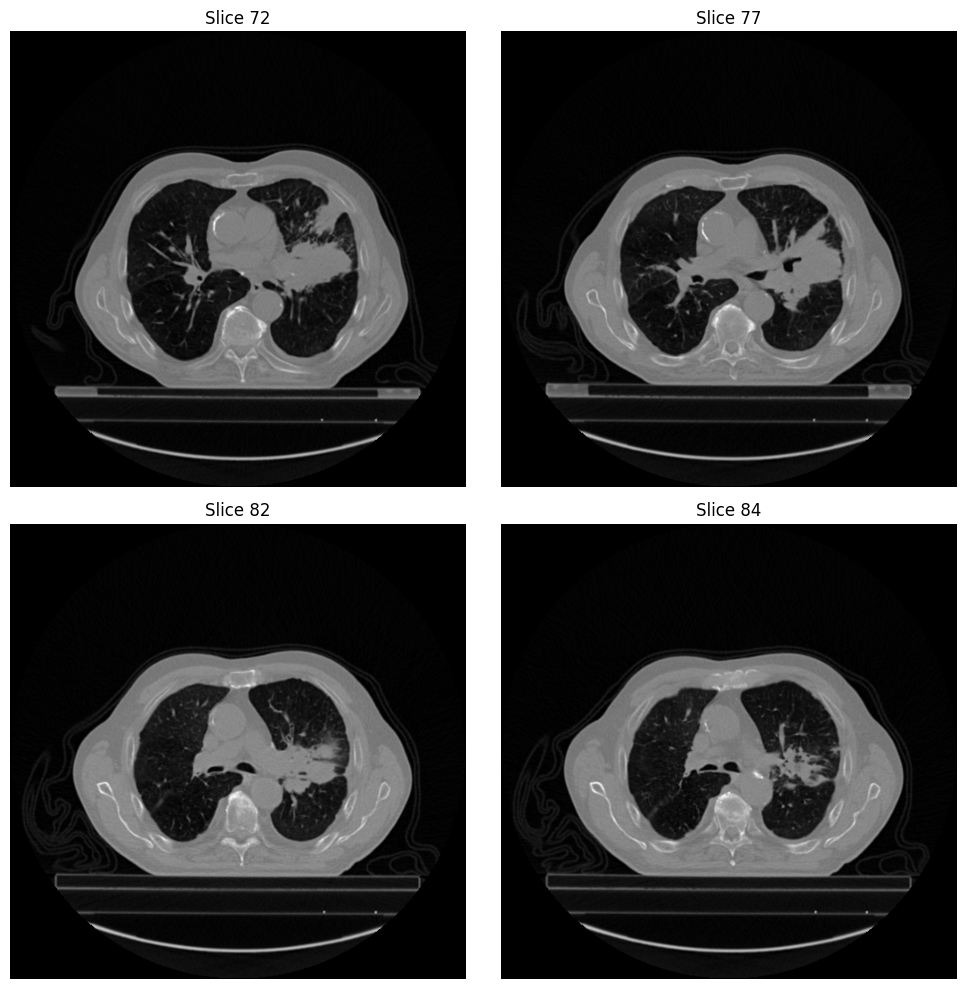

In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np

# define the slices
slices_to_display = [71, 76, 81, 83]

# set a 2X2 figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Traverse the subfigure axes and corresponding slices for display
for ax, slice_idx in zip(axs.ravel(), slices_to_display):
    ax.imshow(original_array[slice_idx, :, :], cmap='gray')
    ax.set_title(f'Slice {slice_idx + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()



### Overlay with the masks
Overlay the above slices with the masks.
When plotting the masks, define a value for the parameter 'alpha' of function imshow() and use a different colormap.

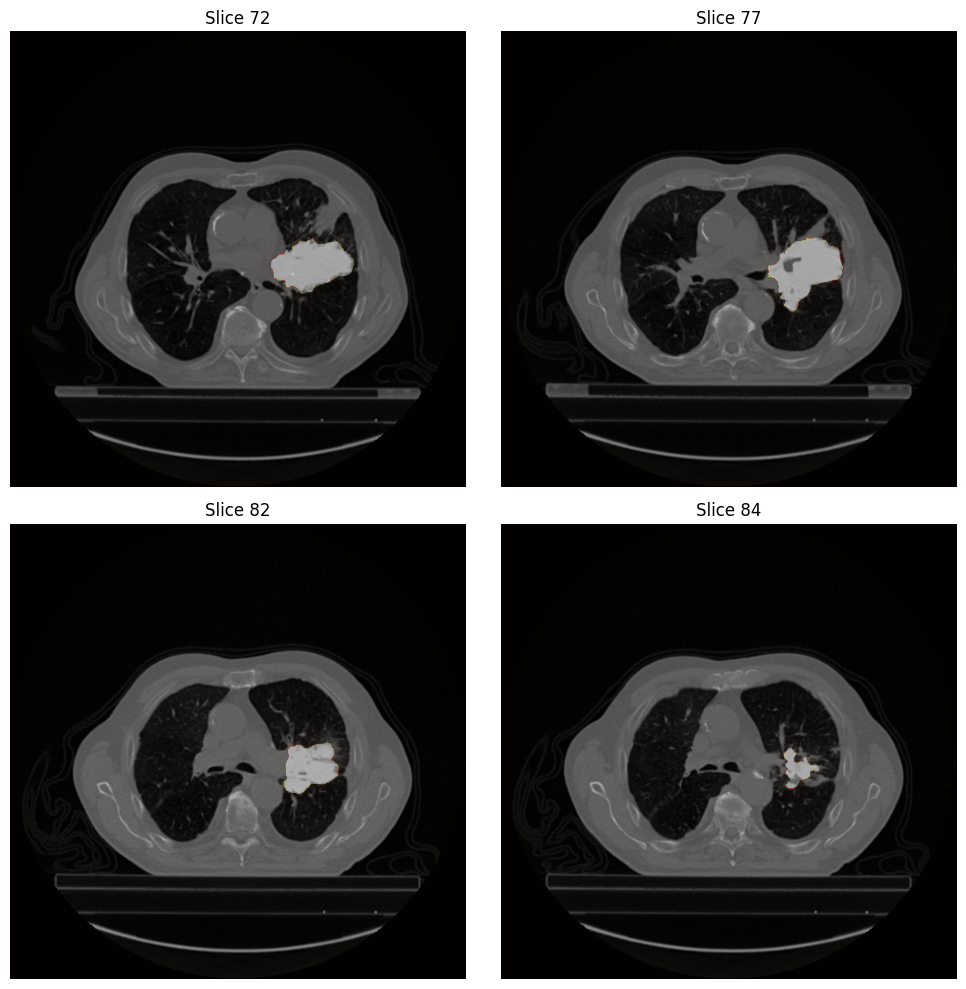

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the slice index to display
slices_to_display = [71, 76, 81, 83]

# Set up a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Traverse subplot axes and slice indexes
for ax, slice_idx in zip(axs.ravel(), slices_to_display):
    ax.imshow(original_array[slice_idx, :, :], cmap='gray')
    ax.imshow(mask_array[slice_idx, :, :], cmap='hot', alpha=0.3)
    ax.set_title(f'Slice {slice_idx + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Feature Extraction: First Order Statistics <br>
To begin with you are going to extract first order statistics, i.e. features that describe the distribution of voxel intensities within the image region of interest (ROI). <Br>
To obtain the ROI, take only the part of the image *where the mask has true labels, i.e. when mask==1*. Use function numpy.where() to get the coordinates and apply them to the numpy image. <br>
Convert the obtained image to type ['float'](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html).
This is necessary for the calculations that follow.


In [ ]:
import numpy as np

# Obtain the image region of interest (ROI)
roi = original_array[mask_array == 1]

# Convert the obtained image to type 'float'
roi = roi.astype('float')

print(len(roi))

54449


Let $X$ be the set of $N_p$ voxels included in the ROI. Given the definitions of the features, calculate the values of the features in the ROI you obtained in the previous step.<br>
Note: you can use existing numpy functions to calculate some features. For example, numpy.mean to calculate feature 'average gray level intesity'.

#### 1. Minimum
The minimum gray level intensity within the ROI.

In [ ]:
min = np.min(roi)
print(min)


-1021.0


#### 2. Maximum
The maximum gray level intesity within the ROI. <br>


In [ ]:
max = np.max(roi)
print(max)

1040.0


#### 3. Range
The range of gray values in the ROI.<br>
$Range=max(X(i))-min(X(i))$

In [ ]:
range = max - min
print(range)

2061.0


#### 4. Average
The average gray level intesity within the ROI. <br>
$Mean=\frac{1}{N_p}\sum^{N_p}_{i=1}X(i)$

In [ ]:
mean = np.mean(roi)
print(mean)

-62.91303788866646


#### 5. Energy
Energy is a measure of the magnitude of voxel values in an image. <br>

$Energy=\sum^{N}_{i=1}(X(i)+c)^2$

$c$ is a parameter which is used to shift the intensities to prevent negative values in X.<br>

When using CT images a good practice is to use the value $1024$. Can you explain why? <br>
<font color=blue> CT imaging uses Hounsfield Units (HU) to represent voxel values. The HU scale is calibrated so that air has a value of -1000 HU. This causes a lot of voxel values to be negative. By adding a constant value of 1024, we ensures that the resulting values are all positive and avoid issues with negative numbers in calculation.</font>

In [ ]:
c = 1024
energy = np.sum((roi + c) ** 2)
print(energy)

52509710748.0


#### 6. Root Mean Square
The squared root of the mean of the squared intensities in the ROI.<br>
$RMS=\sqrt{\frac{1}{N_p}\sum^{N_p}_{i=1}(X(i)+c)^2}$

In [ ]:
c = 1024
rms = np.sqrt(np.mean((roi + c) ** 2))
print(rms)

982.0302345956065


#### 7. Standard Deviation

In [ ]:
std_deviation = np.std(roi)
print(std_deviation)

201.73059490198818


### Feature Extraction: Shape Features

In this exercise you are going to extract some shape features which are descriptors of the three-dimensional size and shape of the ROI and they are independent from the gray level intensity distribution in the ROI. Calculate the following features

#### 1. Volume
$Volume\approx N_p * V_i$ <br>
You can approximate volume by multiplying the total number of pixels with the volume of each pixel. To do this you need to get the size of a pixel by using the function GetSpacing(). The spacing is the geometric distance between image samples along each dimension.<br>

In [ ]:
# Get the voxel spacing
spacing = itk_image.GetSpacing()

# Calculate the volume of a single voxel
voxel_volume = spacing[0] * spacing[1] * spacing[2]

# Calculate the number of voxels in the ROI
number_of_voxels = np.sum(mask_array)

# Calculate the volume of ROI
volume = number_of_voxels * voxel_volume

print(volume)

155779.83856201172


#### 3. Surface Area to Volume ratio
Given that the surface area is 23501.6761259, calculate the surface area to volume ratio. <br>
This feature gives an insight of the shape of the ROI. A lower value indicates a more compact (sphere-like) shape.

In [ ]:
surface = 23501.6761259
ratio = surface / volume
print(ratio)

0.15086468404924314


#### 4. Compactness
 a measure of how compact the shape of the tumor is relative to a sphere (most compact). It is therefore correlated to Sphericity and redundant. It is provided here for completeness. The value range is [0,1/(6pi)], where a value of 16π indicates a perfect sphere.<br>
$Compactness=\frac{Volume}{\sqrt{\pi \cdot Surface^3}}$

In [ ]:
compactness = volume / np.sqrt(np.pi * (surface ** 3))
print(compactness)

0.024394282987816377


#### 5. Shperical Disproportion
Spherical Disproportion is the ratio of the surface area of the tumor region to the surface area of a sphere with the same volume as the tumor region, and by definition, the inverse of Sphericity. Therefore, the value range is greater than 1 with a value of 1 indicating a perfect sphere. <br>
$Spherical Disporportion=\frac{Surface}{4\cdot\pi\cdot R^2}$
where $R$ the radius of a sphere with volume equal to the volume of the tumor, i.e. $R=\sqrt[3]{\frac{3\cdot Volume}{4 \cdot \pi}}$

In [ ]:
R = (3 * volume / (4 * np.pi)) ** (1/3)

spherical_disproportion = surface / (4 * np.pi * R**2)

print(spherical_disproportion)


1.6785742100053993


## Part 2: Feature Visualization
In this exercise you are given the values of the above features extracted from the CT images of 122 patients. Download the file features.csv that contains all the features extracted from these patients.
- Load the features in pandas dataframe using function [pd.read_csv()]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Define ';' as the delimeter.
- Print the first 10 rows of the dataframe using function [head()]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- Drop the last column of the frame using function [drop]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) The last column of this dataframe contains the labels assigned to each lesion found in the CT scan, i.e. benign (no cancer) or malignant.


In [ ]:
import pandas as pd

path = pjoin('gdrive', 'MyDrive','WPO4')
file_name = 'features.csv'
features = pjoin(path, file_name)


features_df = pd.read_csv(features, sep=';')

# Print the first 10 rows of the DataFrame
print(features_df.head(10))

# Remove last column of DataFrame
features_df_dropped = features_df.drop(features_df.columns[-1], axis=1)

# Print the first 10 rows of the modified DataFrame to confirm that the last column has been removed
print(features_df_dropped.head(10))


    min   max  range     average      energy         rms         std  \
0 -1024   615   1639  -49.124253  7183072911  239.522345  234.430718   
1  -961   230   1191 -100.581455   868119204  267.731628  248.120124   
2  -994   607   1601  -47.559032   863753559  171.308006  164.573908   
3 -1024  2621   3645    2.184743  1016158941  186.989867  186.977103   
4  -966   488   1454  -66.045163   829535347  241.757718  232.561455   
5 -1024   250   1274   -0.368995   977138398  168.774045  168.773641   
6 -1022   278   1300 -202.641291  3124963798  335.461261  267.340167   
7 -1024   348   1372 -196.001238  4705189658  391.527095  338.935069   
8  -999  1062   2061  -54.506685  7088061300  306.172019  301.281142   
9 -1024   601   1625 -184.827145  5508300763  378.702329  330.536504   

         volume      surfacde  surfaceovervolume  sphercal disporportion  \
0  358532.54670  35689.207210           0.099542                1.462291   
1   34680.90216   9287.689178           0.267804       

Normalize your features in the range $[0,1]$. A normalized feature is obtained like this <br>$Normalized \, Feature=\frac{original \, Feature-min(Feature)}{max(Feature)-min(Feature))}$ <br>
However, using scikit-learn you can do that with  [this function]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the normalizer
scaler = MinMaxScaler()

# normalize features
normalized_data = scaler.fit_transform(features_df)

# Convert normalized data back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=features_df.columns)

# View normalized data
print(normalized_df.head())


        min       max     range   average    energy       rms       std  \
0  0.000000  0.182423  0.248682  0.807346  1.000000  0.302702  0.620971   
1  0.150000  0.054261  0.109767  0.732371  0.119012  0.349388  0.666168   
2  0.071429  0.179760  0.236899  0.809627  0.118403  0.189809  0.390332   
3  0.000000  0.850200  0.870698  0.882106  0.139664  0.215762  0.464299   
4  0.138095  0.140146  0.191318  0.782692  0.113629  0.306402  0.614799   

     volume  surfacde  surfaceovervolume  sphercal disporportion  compactness  \
0  0.542413  0.733007           0.043238                0.135673     0.689769   
1  0.051161  0.180696           0.319760                0.339772     0.399630   
2  0.126290  0.386554           0.252952                0.489989     0.260591   
3  0.124793  0.398841           0.268978                0.537482     0.225040   
4  0.060205  0.155949           0.207366                0.109212     0.740556   

   label  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.

Get two sets of datasets; one where the label is benign (benignData) and one where the label is malignant (MalignantData)

In [ ]:
import pandas as pd

benignData = normalized_df[normalized_df['label'] == 0]
MalignantData = normalized_df[normalized_df['label'] == 1]
benignData = benignData.drop(benignData.columns[-1], axis=1)
MalignantData = MalignantData.drop(MalignantData.columns[-1], axis=1)

print(benignData)


          min       max     range   average    energy       rms       std  \
0    0.000000  0.182423  0.248682  0.807346  1.000000  0.302702  0.620971   
1    0.150000  0.054261  0.109767  0.732371  0.119012  0.349388  0.666168   
2    0.071429  0.179760  0.236899  0.809627  0.118403  0.189809  0.390332   
3    0.000000  0.850200  0.870698  0.882106  0.139664  0.215762  0.464299   
4    0.138095  0.140146  0.191318  0.782692  0.113629  0.306402  0.614799   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.007143  0.559254  0.598760  0.864614  0.144259  0.193709  0.419428   
109  0.273810  0.033955  0.074729  0.855796  0.064352  0.150020  0.330357   
110  0.000000  0.344208  0.399380  0.915814  0.245772  0.174974  0.376412   
112  0.064286  0.235686  0.289922  0.866264  0.044638  0.111348  0.255034   
113  0.057143  0.049268  0.117209  0.844340  0.016567  0.111401  0.248573   

       volume  surfacde  surfaceovervolume  sphercal disporportion  \
0    

Print the mean and standard deviation of all the features of the benign and malignant datasets separately

In [ ]:
#Print the feature mean and standard deviation of the benign data set
print("Benign Dataset:")
print(benignData.mean())
print(benignData.std())

#Print the feature mean and standard deviation of the malignant data set
print("\nMalignant Dataset:")
print(MalignantData.mean())
print(MalignantData.std())


Benign Dataset:
min                       0.182403
max                       0.192067
range                     0.233910
average                   0.779848
energy                    0.193957
rms                       0.264923
std                       0.470261
volume                    0.171963
surfacde                  0.351346
surfaceovervolume         0.240227
sphercal disporportion    0.267617
compactness               0.533461
dtype: float64
min                       0.215762
max                       0.192145
range                     0.183944
average                   0.173397
energy                    0.219193
rms                       0.180587
std                       0.222559
volume                    0.188817
surfacde                  0.264855
surfaceovervolume         0.146503
sphercal disporportion    0.188470
compactness               0.216510
dtype: float64

Malignant Dataset:
min                       0.230172
max                       0.085225
range                   

Use matplotlib's [violin plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.violinplot.html) to plot the distribution of the first feature in the benign and the malignant dataset.
You can find an example [here](https://www.tutorialspoint.com/matplotlib/matplotlib_violin_plot.htm)

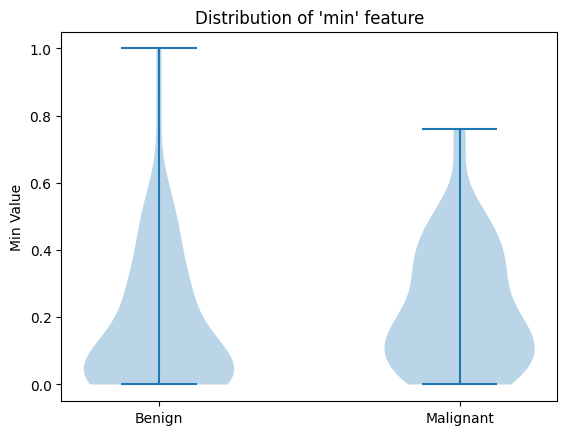

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.violinplot([benignData['min'], MalignantData['min']])
plt.xticks([1, 2], ['Benign', 'Malignant'])
plt.ylabel('Min Value')
plt.title("Distribution of 'min' feature")
plt.show()


Plot the boxplots of the benign ad malignant datasets in two separate graphs. A boxplot shows the distribution of a feature using its quartiles. To do this you can use function pyplot.boxplot().

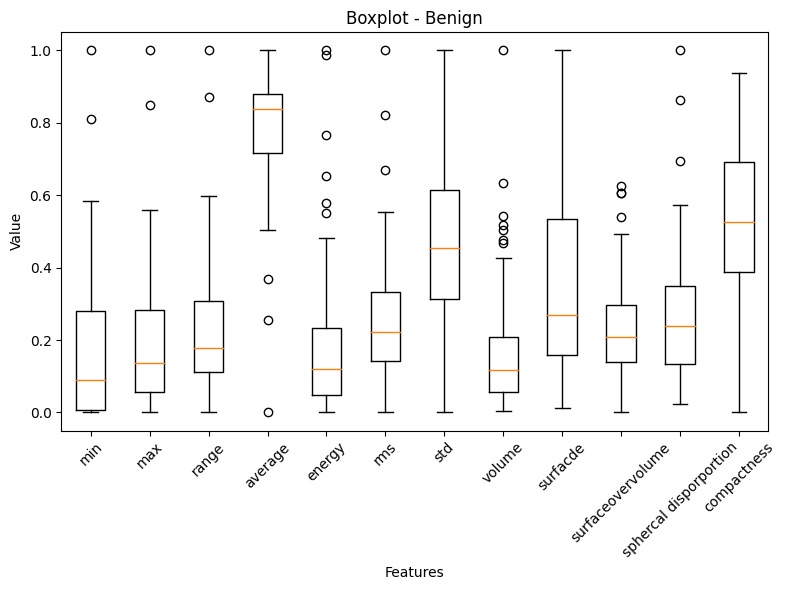

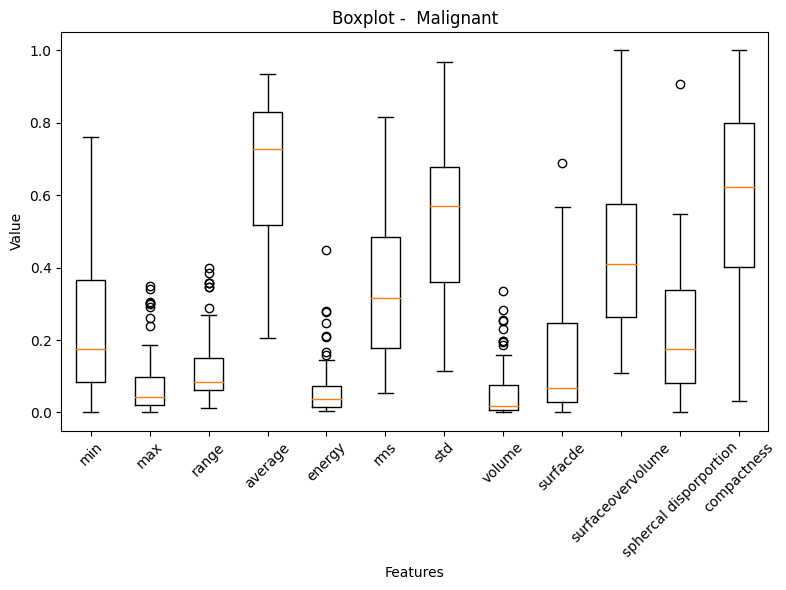

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Draw box plots of benign data sets
plt.figure(figsize=(8, 6))
data = [benignData['min'], benignData['max'],benignData['range'],benignData['average'],benignData['energy'],benignData['rms'],benignData['std'],benignData['volume'],benignData['surfacde'],benignData['surfaceovervolume'],benignData['sphercal disporportion'],benignData['compactness']]

# Create a box plot
plt.boxplot(data)

plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], ['min', 'max', 'range','average','energy','rms','std','volume','surfacde','surfaceovervolume','sphercal disporportion','compactness'], rotation=45)
plt.title('Boxplot - Benign')
plt.xlabel('Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Draw box plots of malignant data sets
plt.figure(figsize=(8, 6))
data = [ MalignantData['min'],  MalignantData['max'], MalignantData['range'], MalignantData['average'], MalignantData['energy'], MalignantData['rms'], MalignantData['std'], MalignantData['volume'], MalignantData['surfacde'], MalignantData['surfaceovervolume'], MalignantData['sphercal disporportion'], MalignantData['compactness']]

# Create a box plot
plt.boxplot(data)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], ['min', 'max', 'range','average','energy','rms','std','volume','surfacde','surfaceovervolume','sphercal disporportion','compactness'],  rotation=45)

plt.title('Boxplot -  Malignant')
plt.xlabel('Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


Plot the histogram of the feature surface over volume of the benign and malignant datasets in one graph. The histogram shows the distribution of a single feature. To do this you can use function pyplot.hist.  

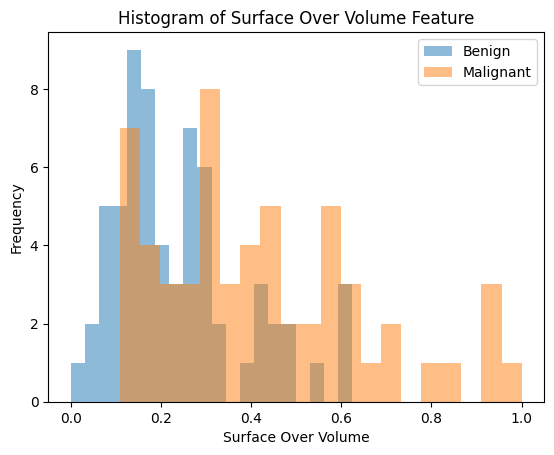

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(benignData['surfaceovervolume'], bins=20, alpha=0.5, label='Benign')
plt.hist(MalignantData['surfaceovervolume'], bins=20, alpha=0.5, label='Malignant')
plt.xlabel('Surface Over Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Surface Over Volume Feature')
plt.legend()
plt.show()

Finally, plot in a 2X2 figure the scatter plots of the following combinations of features:
- min and rms
- max and range
- range and surface over volume
- volume and surface

A scatterplot shows the relation between two features.

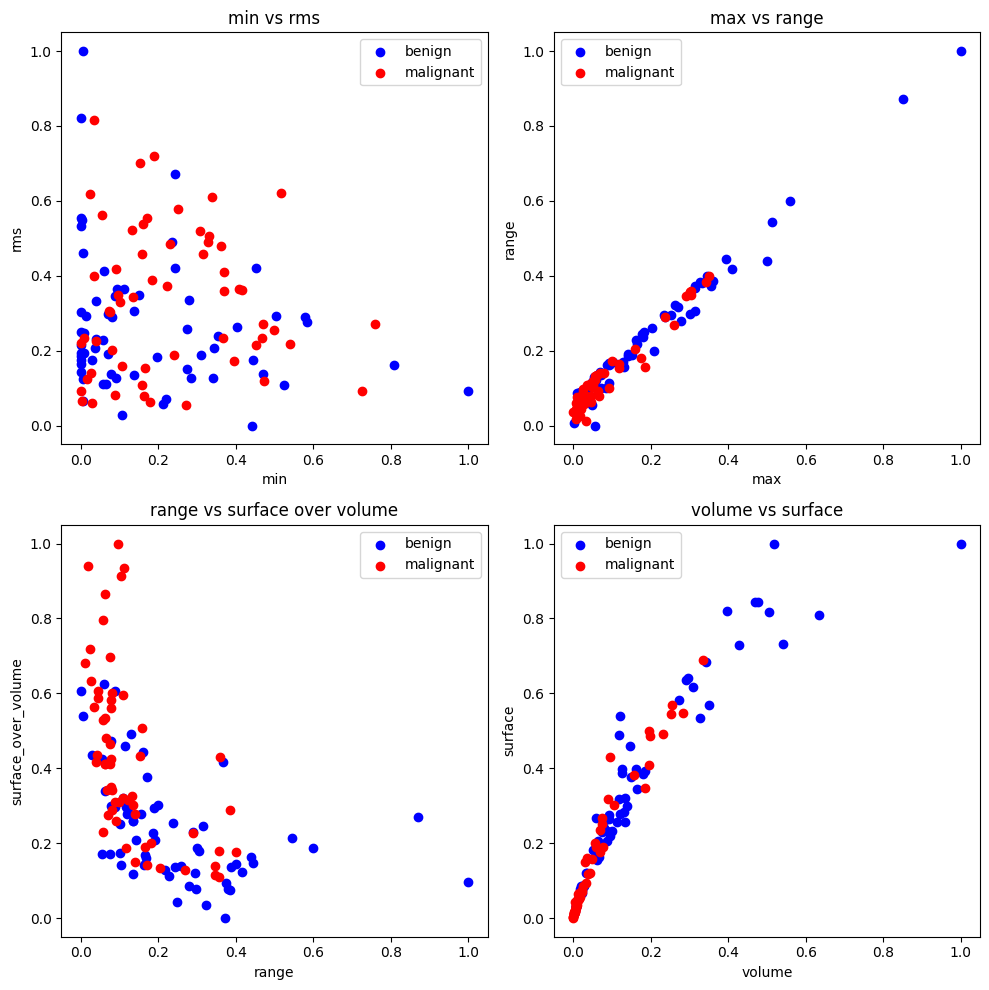

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axs = plt.subplots(2, 2, figsize=(10, 10))


axs[0, 0].scatter(benignData['min'], benignData['rms'],color='blue',label='benign')
axs[0, 0].scatter(MalignantData['min'], MalignantData['rms'],color='red',label='malignant')
axs[0, 0].set_title('min vs rms')
axs[0, 0].set_xlabel('min')
axs[0, 0].set_ylabel('rms')

axs[0,0].legend()


axs[0, 1].scatter(benignData['max'], benignData['range'],color='blue',label='benign')
axs[0, 1].scatter(MalignantData['max'], MalignantData['range'],color='red',label='malignant')
axs[0, 1].set_title('max vs range')
axs[0, 1].set_xlabel('max')
axs[0, 1].set_ylabel('range')

axs[0,1].legend()


axs[1, 0].scatter(benignData['range'], benignData['surfaceovervolume'],color='blue',label='benign')
axs[1, 0].scatter(MalignantData['range'], MalignantData['surfaceovervolume'],color='red',label='malignant')
axs[1, 0].set_title('range vs surface over volume')
axs[1, 0].set_xlabel('range')
axs[1, 0].set_ylabel('surface_over_volume')

axs[1,0].legend()


axs[1, 1].scatter(benignData['volume'], benignData['surfacde'],color='blue',label='benign')
axs[1, 1].scatter(MalignantData['volume'], MalignantData['surfacde'],color='red',label='malignant')
axs[1, 1].set_title('volume vs surface')
axs[1, 1].set_xlabel('volume')
axs[1, 1].set_ylabel('surface')

axs[1, 1].legend()


plt.tight_layout()
plt.show()


Describe the relationships you see between the features

<font color=blue>
1. Min vs RMS:
   - benign points are scattered throughout the plot but tend to cluster more towards the middle of the x-axis (min).
   - malignant points are also scattered but there is a noticeable concentration of them towards the lower end of the y-axis (RMS).
2. Max vs Range:
   - benign points show a strong positive linear relationship between the max and range variables, forming a near-diagonal line from the bottom left to the top right of the plot.
   - malignant points are concentrated at the lower end of both the x-axis (max) and y-axis (range), indicating lower values for both variables.
3. Range vs Surface Over Volume:
   - benign points are spread out across the plot but with a trend of clustering more towards the lower end of the y-axis (surface over volume).
   - malignant points are also spread out with a slight concentration towards the lower end of both the x-axis (range) and y-axis.
4. Volume vs Surface:
   - benign points again show a strong positive linear relationship, suggesting that as volume increases, the surface also increases.
   - malignant points are present mostly at the lower end of both variables, similar to the second graph, indicating lower values of volume and surface.</font>

## Part 3: A simple classifier

Take the features resulting from dropping the last column of the dataframe in the beginning of part 2. This is the set of features describing the ROIs of the 122 patients. The dropped column is the label assigned to the ROI.<br>
In this exercise you will train a classifier with a portion of the features' set and use it to predict the label of an unseen set of features
1. Divide your dataset in training and testing parts so that 70% of the dataset is a training set and 30% a test set. (use random state=40). https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2. Normalize the training set and apply the normalization on the test set. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
3. Use the normalized training set to train an SVM classifier and predict on the unseen testing set. Use the default values of the classifier found [here]( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
4. Calculate the score of your classifier using [this function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

In [ ]:
features_df_dropped

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = features_df.drop('label', axis=1)
y = features_df['label']

# Divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy}")


Accuracy of the SVM classifier: 0.6486486486486487
